# Hierarchical Clustering of a Mixture Model for the digits dataset¶

In [1]:
%matplotlib inline
# Standard scientific Python imports
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from mylib.Hierarchical_Clustering_Mixture_Model import Hierarchical_Mixture_Model 
from sklearn.mixture import GaussianMixture

In [2]:
def performance_confusion(y_test , labels_hcmm, labels_gmm , option = None ):
    
    labels_dic_hcmm= dict()
    labels_dic_gmm= dict() 
    
    print('*'*15, "Hierarchical_Clustering_Mixture_Model ",'*'*15)
    for i in np.unique(labels_hcmm ) :
        
        labels_dic_hcmm[i] = y_test[labels_hcmm == i]
        if option == 'print' :
            unique_elements, counts_elements = np.unique(labels_dic_hcmm[i], return_counts=True)
            print('-'*100)
            print('| \t cluster = ', i ,"\t\t\t\t| ")  
            print('-'*100)
            print('| \t unique_elements of cluster \t\t| ', unique_elements )
            print('| \t counts_elements of cluster \t\t| ', counts_elements)
            print('-'*100)

    print('*'*15, "Gaussian_Mixture_Model ",'*'*15)
    for i in np.unique(labels_gmm ) :
        
        labels_dic_gmm[i] = y_test[labels_gmm == i]
        if option  == 'print' :
            unique_elements, counts_elements = np.unique(labels_dic_gmm[i], return_counts=True)
            print('-'*100)
            print('| \t cluster = ', i ,"\t\t\t\t| ")  
            print('-'*100)
            print('| \t unique_elements of cluster \t\t| ', unique_elements )
            print('| \t counts_elements of cluster \t\t| ', counts_elements)
            print('-'*100)
 
    hcmm = labels_dic_hcmm.values()
    gmm = labels_dic_gmm.values()
    
    index_hcmm = set.intersection(*[set(list) for list in hcmm])
    index_gmm = set.intersection(*[set(list) for list in gmm])
    
    arr_hcmm=dict()
    for it in index_hcmm :
        lst =[]
        for row in hcmm :
            lst.append(row[np.where(row==it)].shape[0])
        arr_hcmm[it] = min(lst) 
        

    arr_gmm=dict()
    for it in index_gmm :
        lst =[]
        for row in gmm :
            lst.append(row[np.where(row==it)].shape[0])
        arr_gmm[it] = min(lst) 
    print('*'*15, "the performance of HCMM & GMM", '*'*15)   
    print('-'*100)
    print("| \t the purity of assignments provided by HCMM  \t|  ", arr_hcmm)
    print("| \t the purity of assignments provided by GM  \t|  ", arr_gmm)

# loading data

In [3]:
digits = load_digits()

# Plot the data: images of digits

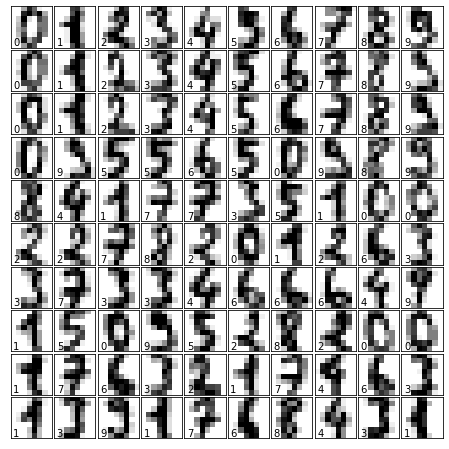

In [4]:

fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
n = 10
m = 10
for i in range(n*m):
    ax = fig.add_subplot(n, m, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

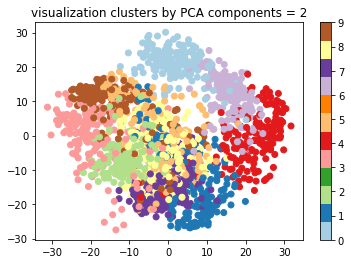

In [6]:
plt.figure()
pca = PCA(n_components=2)
proj = pca.fit_transform(digits.data)
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target, cmap="Paired")
plt.colorbar()
plt.title("visualization clusters by PCA components = 2")
plt.show()

# flatten the images

In [7]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into 60% train and 40% test subsets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2, shuffle=False)

In [9]:
print(" data for training : " , X_train.shape[0])
print(" data for testing  : " ,  X_test.shape[0])

 data for training :  1437
 data for testing  :  360


# Add noise to avoid singulair matrix in the training

In [10]:
noise_factor =  0.2  
x_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape) 
x_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

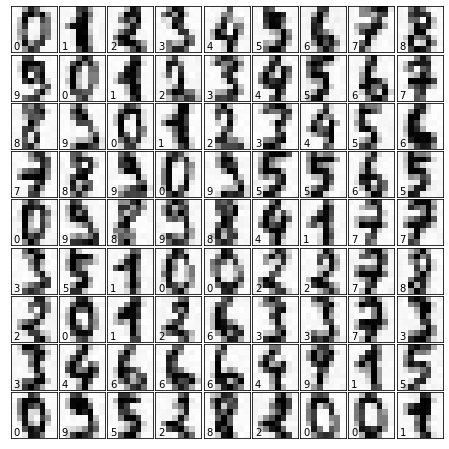

In [11]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))  
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
n = 9
m = 9
for i in range(n*m):
    ax = fig.add_subplot(n, m, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train_noisy[i].reshape(8, 8), cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))

# training model HCMM

In [12]:
k = 10
m = 2
HCMM = Hierarchical_Mixture_Model(k,m)
myfit = HCMM.fit(x_train_noisy) 
labels_hcmm= HCMM.predict(x_test_noisy)

Converged


In [14]:
myfit.converged

True

In [12]:
labels_hcmm

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,

# training model GMM

In [13]:
gm = GaussianMixture(n_components=m, random_state=0).fit(x_train_noisy)
labels_gmm= gm.predict(x_test_noisy)

# Performance : GMM vs HCMM

In [14]:
performance_confusion(y_test , labels_hcmm, labels_gmm , option = 'print' )

*************** Hierarchical_Clustering_Mixture_Model  ***************
----------------------------------------------------------------------------------------------------
| 	 cluster =  0 				| 
----------------------------------------------------------------------------------------------------
| 	 unique_elements of cluster 		|  [1 2 3 4 5 6 7 8 9]
| 	 counts_elements of cluster 		|  [36 35 37  4 36  2 36 33 37]
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
| 	 cluster =  1 				| 
----------------------------------------------------------------------------------------------------
| 	 unique_elements of cluster 		|  [0 4 5 6]
| 	 counts_elements of cluster 		|  [35 33  1 35]
----------------------------------------------------------------------------------------------------
*************** Gaussian_Mixture_Model  ***************
--

# Plot some results of clustering of HCMM

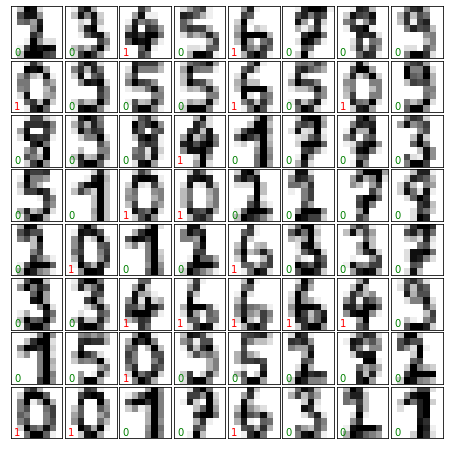

In [15]:
# use the model to predict the labels of the test data
predicted = labels_hcmm
expected = y_test
# Plot the prediction
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')
    if predicted[i] == 0 :
        ax.text(0, 7, str(predicted[i]), color='green')
    else :
        ax.text(0, 7, str(predicted[i]), color='red')